Team ID-PNT2022-TMID43750

### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

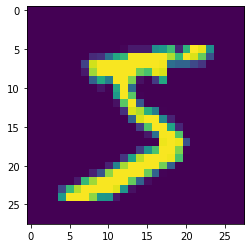

In [6]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2703 - accuracy: 0.9496 - val_loss: 0.1035 - val_accuracy: 0.9700
Epoch 2/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0768 - accuracy: 0.9765 - val_loss: 0.1028 - val_accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0557 - accuracy: 0.9822 - val_loss: 0.0970 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0936 - val_accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.1040 - val_accuracy: 0.9759


### Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1040244847536087, 0.9758999943733215]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 79ms/step
[[1.21143362e-12 8.17489881e-19 1.88146762e-10 2.20922291e-11
  3.91393163e-18 9.34812750e-15 1.16008876e-19 1.00000000e+00
  9.18226883e-10 2.09033017e-11]
 [9.01161741e-08 1.59342192e-10 9.99999881e-01 9.49912510e-11
  1.45064288e-12 1.03042114e-16 2.23276651e-08 1.29318044e-19
  7.65120051e-11 6.77595323e-14]
 [3.97356992e-08 9.99952078e-01 3.94103881e-06 1.21791180e-11
  4.25275539e-05 2.00995530e-07 1.01683852e-08 1.78783370e-08
  1.17296986e-06 6.04665650e-14]
 [1.00000000e+00 1.06735244e-16 1.50717572e-09 3.66405040e-14
  6.36639786e-12 3.27077124e-12 2.44187621e-08 1.20235810e-14
  3.60419295e-13 1.85450251e-08]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

NameError: ignored

### Save the model

In [16]:
model.save("model.h5")

### Test the saved model

In [17]:
model=load_model("model.h5")

In [18]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

FileNotFoundError: ignored